In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [49]:
salary_data=pd.read_excel('C:/Users/GHRCE/Documents/salary.xlsx')
salary_data.head()

,Age,Yearsofservice,Salary
0,27,1.7,39343
1,26,1.1,43205
2,26,1.2,47731
3,27,1.6,46525
4,26,1.5,40891


In [50]:
x=np.array(salary_data['Age'])
y=np.array(salary_data['Salary'])
l=len(x)


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32)
lx=len(x_train)

In [53]:
class mini_batch_gradient_descent:
    def create_batch(self,x_train,y_train,batch_size):
        mini_batches=[]
        data=np.stack((x_train,y_train),axis=1)
        np.random.shuffle(data)
        no_of_batches=x_train.shape[0]//batch_size
        for i in range(no_of_batches):
            mini_batch=data[i*batch_size:(i+1)*batch_size]
            mini_batches.append((mini_batch[:,0],mini_batch[:,1]))
        if x_train.shape[0]%batch_size!=0:
            mini_batch=data[(i+1)*batch_size:]
            mini_batches.append((mini_batch[:,0],mini_batch[:,1]))
        return mini_batches
    
    def fit(self,x_train,y_train,alpha,epochs,batch_size):
        self.m=np.random.randn(1,1)
        self.c=np.random.randn(1,1)
        l=len(x_train)
        for i in range(epochs):
            batches=self.create_batch(x_train,y_train,batch_size)
            for batch in batches:
                xb=batch[0]
                yb=batch[1]
                xb=xb.reshape(1,xb.shape[0])
                intecept=np.sum((np.dot(self.m,xb)+self.c)-yb)
                slope=np.sum(((np.dot(self.m,xb)+self.c)-yb)*xb)
                self.m=self.m-alpha*(slope/l)
                self.c=self.c-alpha*(intecept/l)
    def slope_intercept(self):
        print(f"slope is {self.m[0][0]}")
        print(f"intecept is {self.c[0][0]}")
    def predict(self,x_test):
        x_test=x_test.reshape(x_test.shape[0],1)
        self.m=self.m.reshape(self.m.shape[1],self.m.shape[0])
        result=np.dot(x_test,self.m)+self.c
        return result

In [54]:
mgd=mini_batch_gradient_descent()

In [73]:
mgd.fit(x_train,y_train,0.01,4000,2)

In [74]:
mgd.slope_intercept()

slope is 1773.5413155405588
intecept is 2991.759914260793


In [75]:
y_pred=mgd.predict(x_test)

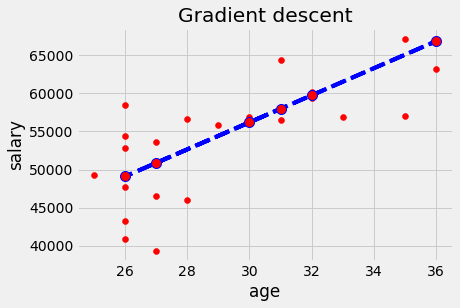

In [76]:
plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("age")
plt.ylabel("salary")
plt.title("Gradient descent")
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import explained_variance_score

In [78]:
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

12822190.417021245
3580.808626137572
2941.4026055825584
0.5053496411927254
0.35375058559286254
